In [1]:
from utils import *
from terminal_models import FeedforwardUnicycle
from feedforward_network import FeedForwardNet
import torch
import matplotlib.pyplot as plt


In [2]:
net0 = torch.load('./nets/net0.pth')
net1 = torch.load('./nets/net1.pth')
net2 = torch.load('./nets/net2.pth')
net3 = torch.load('./nets/net3.pth')
net4 = torch.load('./nets/net4.pth')
net5 = torch.load('./nets/net5.pth')
net6 = torch.load('./nets/net6.pth')
net7 = torch.load('./nets/net7.pth')
net8 = torch.load('./nets/net8.pth')
net9 = torch.load('./nets/net9.pth')
#net10 = torch.load('./nets2/net10.pth')


In [4]:
nets = [net0, net1, net2, net3, net4, 
      net5,net6, net7, net8,
      net9]

In [5]:
#data = grid_data(size = 20, xy_limits=[-1, 1], theta_lims=[-1, 1])
data = random_positions(size = 200, xlim=[-1, 1], ylim=[-1,1], zlim=[-1,1])

In [6]:

terminal_uni = FeedforwardUnicycle(net9)
states, v10 = statesValues(init_positions=data, terminal_model=terminal_uni, as_tensor=True)

In [7]:
errors = []

with torch.no_grad():
    p0 = net0(states).detach().numpy().reshape(-1, 1)
    p1 = net1(states).detach().numpy().reshape(-1, 1)
    p2 = net2(states).detach().numpy().reshape(-1, 1)
    p3 = net3(states).detach().numpy().reshape(-1, 1)
    p4 = net4(states).detach().numpy().reshape(-1, 1)
    p5 = net5(states).detach().numpy().reshape(-1, 1)
    p6 = net6(states).detach().numpy().reshape(-1, 1)
    p7 = net7(states).detach().numpy().reshape(-1, 1)
    p8 = net8(states).detach().numpy().reshape(-1, 1)
    p9 = net9(states).detach().numpy().reshape(-1, 1)
    #p10 = net10(states).detach().numpy().reshape(-1, 1)

In [8]:

v10 = v10.detach().numpy().reshape(-1,1)

errors.append(np.abs(np.mean(v10 - p0)))
errors.append(np.abs(np.mean(v10 - p1)))
errors.append(np.abs(np.mean(v10 - p2)))
errors.append(np.abs(np.mean(v10 - p3)))
errors.append(np.abs(np.mean(v10 - p4)))
errors.append(np.abs(np.mean(v10 - p5)))
errors.append(np.abs(np.mean(v10 - p6)))
errors.append(np.abs(np.mean(v10 - p7)))
errors.append(np.abs(np.mean(v10 - p8)))
errors.append(np.abs(np.mean(v10 - p9)))
#errors.append(np.abs(np.mean(v10 - p10)))

Text(0.5, 1.0, 'Increase in Mean Error with Irepa iterations')

<Figure size 432x288 with 0 Axes>

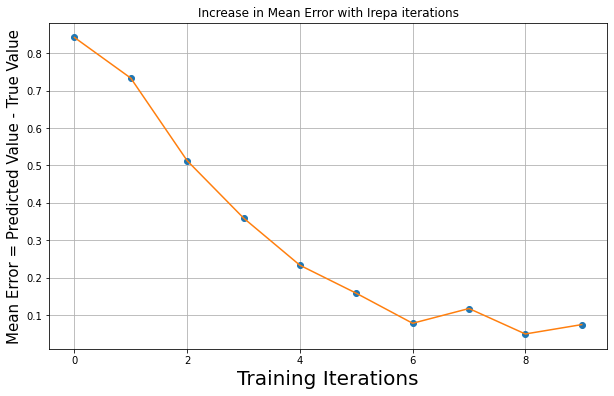

In [9]:

plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(errors, "o",)
plt.plot(errors)
plt.xlabel("Training Iterations", fontsize = 20)
plt.ylabel("Mean Error = Predicted Value - True Value", fontsize = 15)
plt.grid()
plt.title("Increase in Mean Error with Irepa iterations")